In [1]:
# import libraries 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import keras as keras
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images and set data path
IMAGE_SIZE = (224, 224, 3)

data_dir = "C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\brain_tumor_dataset"

In [3]:
# Impor MobileNetV2 library
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [5]:
# getting number of output classes
folders = glob('C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\brain_tumor_dataset/*')

In [6]:
# Check classes
folders

['C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\brain_tumor_dataset\\no',
 'C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\brain_tumor_dataset\\yes']

In [7]:
# Set our layers
x = Flatten()(mobilenet.output)
x = keras.layers.Dropout(0.2)(x)

In [8]:
# Prediction layer
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [9]:
# set cost and optimization method 
model.compile(
  loss="categorical_crossentropy",
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.25,
                                   horizontal_flip = True)

In [11]:
# Train set
training_set = train_datagen.flow_from_directory(data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 subset = "training",
                                                 class_mode = 'categorical')

Found 191 images belonging to 2 classes.


In [12]:
# Validation set
validation_set = train_datagen.flow_from_directory(data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 subset = "validation",
                                                 class_mode = 'categorical')

Found 62 images belonging to 2 classes.


In [13]:
# Check classes
validation_set.class_indices

{'no': 0, 'yes': 1}

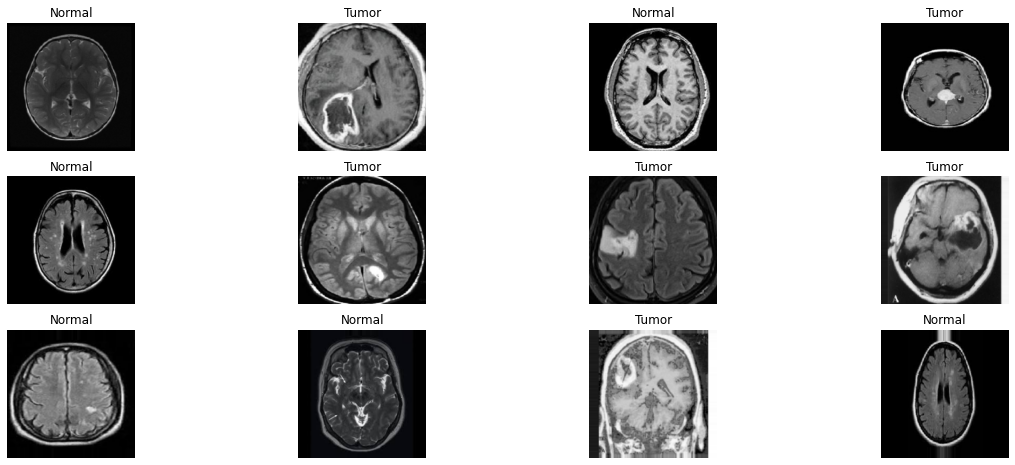

In [16]:
labels = ['Normal', "Tumor"]
sample_data = validation_set.__getitem__(1)[0] 
sample_label = validation_set.__getitem__(1)[1] 

plt.figure(figsize=(20,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis("off")
    plt.imshow(sample_data[i])
    plt.title(labels[np.argmax(sample_label[i])])

In [14]:
# fit the model
# When training accuracy is increase, at the same time validation accuracy is also increase.
# val_accuracy 0.951
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=10,
)

C:\Users\omark\anaconda3\envs\gputest\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/6 [==============================] - 26s 1s/step - loss: 2.3496 - accuracy: 0.5323 - val_loss: 5.6033 - val_accuracy: 0.6452
Epoch 2/10
6/6 [==============================] - 2s 363ms/step - loss: 2.3353 - accuracy: 0.7964 - val_loss: 2.4223 - val_accuracy: 0.8226
Epoch 3/10
6/6 [==============================] - 2s 366ms/step - loss: 2.6417 - accuracy: 0.8193 - val_loss: 2.2247 - val_accuracy: 0.7903
Epoch 4/10
6/6 [==============================] - 2s 362ms/step - loss: 1.4202 - accuracy: 0.8568 - val_loss: 1.0466 - val_accuracy: 0.8548
Epoch 5/10
6/6 [==============================] - 2s 374ms/step - loss: 0.2718 - accuracy: 0.9546 - val_loss: 1.2402 - val_accuracy: 0.8710
Epoch 6/10
6/6 [==============================] - 2s 345ms/step - loss: 0.4922 - accuracy: 0.9298 - val_loss: 0.9873 - val_accuracy: 0.8710
Epoch 7/10
6/6 [==============================] - 2s 360ms/step - loss: 0.1619 - accuracy: 0.9844 - val_loss: 0.9072 - val_accuracy: 0.9194
Epoch 8/10
6/6 [======

In [17]:
# Save model
model.save("model_brain_tumor.h5")

C:\Users\omark\anaconda3\envs\gputest\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
